In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('../datas/ECOLAB_3/E3_all_alert_cluster.csv')


In [20]:
df['datetime']

0         2025-04-07 10:28:44
1         2025-04-07 10:28:50
2         2025-04-07 10:28:53
3         2025-04-07 10:29:00
4         2025-04-07 10:29:04
                 ...         
891757    2025-06-30 11:59:29
891758    2025-06-30 11:59:59
891759    2025-06-30 12:00:29
891760    2025-06-30 12:00:59
891761    2025-06-30 12:01:29
Name: datetime, Length: 891762, dtype: object

In [29]:
for col in df.columns:
    print(col)

Unnamed: 0.2
Unnamed: 0.1
Unnamed: 0
datetime
BP [R]_C1
HP [R]_C1
O2 [R]_C1
CO2 [R]_C1
O2_MMOL [R]_C1
POIDS_1 [R]_C1
POIDS_2 [R]_C1
POIDS_3 [R]_C1
CO2_MMOL [R]_C1
DEFAUT_BP [B]_C1
DEFAUT_HP [B]_C1
A_SECONDES [I]_C1
IRRADIANCE [I]_C1
REARMEMENT [B]_C1
ARU_CELLULE [B]_C1
CONSIGNE_O2 [I]_C1
Etat_Mesure [B]_C1
POIDS_TOTAL [R]_C1
BALLON_CHAUD [R]_C1
BALLON_FROID [R]_C1
CONSIGNE_CO2 [I]_C1
MA_VARIATEUR [B]_C1
COMPRESSEUR_1 [B]_C1
COMPRESSEUR_2 [B]_C1
POMPE_INF_ECO [B]_C1
POMPE_SUP_ECO [B]_C1
PPM_O2_HUMIDE [R]_C1
V2V_AIR_VICIE [B]_C1
V2V_EAU_PLUIE [I]_C1
HAUTEUR_ECOLUX [I]_C1
HUMIDIFICATEUR [I]_C1
POMPE_FOND_ECO [B]_C1
PPM_CO2_HUMIDE [I]_C1
V2V_DESHUMIDIF [B]_C1
VANNE_PROP_INF [I]_C1
VANNE_PROP_SUP [I]_C1
FERMETURE_PORTE [B]_C1
MOLE_O2_DERIVEE [R]_C1
POMPE_UTA_CHAUD [B]_C1
POMPE_UTA_FROID [B]_C1
V2V_CAPTAGE_CO2 [B]_C1
VANNE_PROP_FOND [I]_C1
VANNE_UTA_CHAUD [I]_C1
VANNE_UTA_FROID [I]_C1
VENTILATEUR_CTA [B]_C1
MOLE_CO2_DERIVEE [R]_C1
ORIGINE_COLONNES [B]_C1
V2V_INJECTION_N2 [B]_C1
V2V_INJECTION

<Axes: >

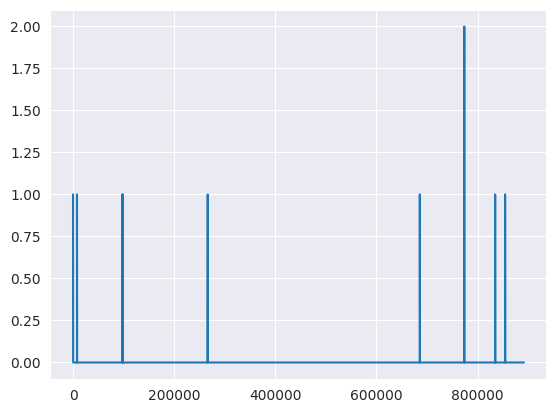

In [7]:
df['anomalie'].plot()

In [8]:
#df.to_csv('../datas/ECOLAB_3/E3_all_alert_cluster_copy.csv', index=False)

In [13]:
#fd = df.loc[(df['datetime'] >= '2025-05-3 00:47:00') & (df['datetime'] <= '2025-06-4 00:59:00')]

#ld = df.loc[(df['datetime'] >= '2025-04-24 17:47:00') & (df['datetime'] <= '2025-04-29 00:59:00')]

In [37]:
fd = df.loc[(df['datetime'] >= '2025-04-7 10:47:00') & (df['datetime'] <= '2025-06-4 00:59:00')]
fd = fd[fd['ecart_temp_C1'].abs() <= 1]

ld = df.loc[(df['datetime'] >= '2025-06-07 17:47:00') & (df['datetime'] <= '2025-06-30 00:59:00')]

ld = ld[ld['ecart_temp_C1'].abs() <= 1]

<Axes: >

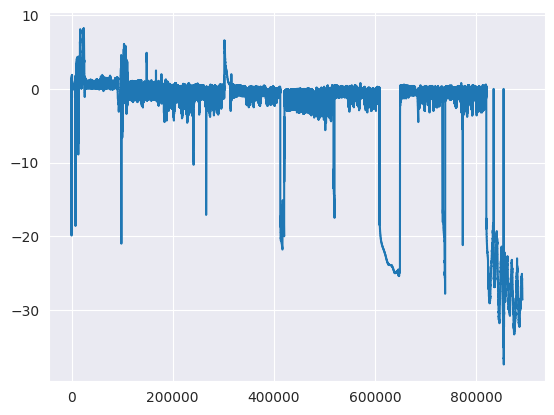

In [40]:
df['ecart_temp_C1'].abs().plot()

<Axes: >

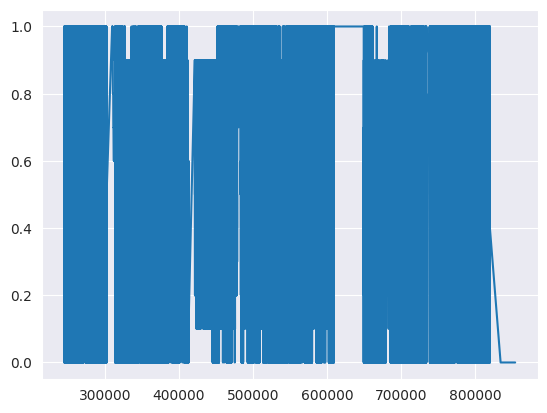

In [41]:
fd['ecart_temp_C1'].abs().plot()

<Axes: >

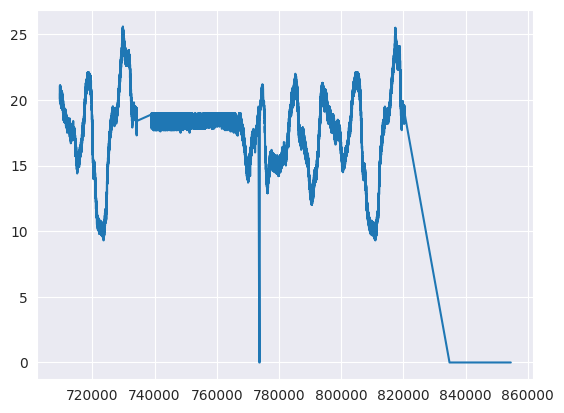

In [39]:
ld['TEMPERATURE_REPRISE [R]_C1'].plot()

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = fd[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
         'CONSIGNE_ECLAIRAGE [I]_C2',
         'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
#'BP_R134_EN_BARS [R]_C4',
#'BP_R134_EN_DEGRES [R]_C4',
       # 'HP_R134_EN_BARS [R]_C4',
#'HP_R134_EN_DEGRES [R]_C4',
  # 'TEMPERATURE_REPRISE [R]_C1',
  #        'TEMPERATURE_REPRISE [R]_C2',
  #        'TEMPERATURE_REPRISE [R]_C3',
  #
  #       'TEMPERATURE_ALLER_CHAUD [R]_C1',
  #       'TEMPERATURE_ALLER_FROID [R]_C1',
  #
  #       'TEMPERATURE_ALLER_CHAUD [R]_C2',
  #       'TEMPERATURE_ALLER_FROID [R]_C2',
  #
  #       'TEMPERATURE_ALLER_CHAUD [R]_C3',
  #       'TEMPERATURE_ALLER_FROID [R]_C3',
  #
  #       'TEMPERATURE_RETOUR_CHAUD [R]_C1',
  #       'TEMPERATURE_RETOUR_FROID [R]_C1',
  #
  #
  #       'TEMPERATURE_RETOUR_CHAUD [R]_C2',
  #       'TEMPERATURE_RETOUR_FROID [R]_C2',
  #
  #
  #       'TEMPERATURE_RETOUR_CHAUD [R]_C3',
  #       'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'

     ]

]

y = fd[[
            'TEMPERATURE_ALLER_CHAUD [R]_C1',
        'TEMPERATURE_ALLER_FROID [R]_C1',

        'TEMPERATURE_ALLER_CHAUD [R]_C2',
        'TEMPERATURE_ALLER_FROID [R]_C2',

        'TEMPERATURE_ALLER_CHAUD [R]_C3',
        'TEMPERATURE_ALLER_FROID [R]_C3',

        'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        'TEMPERATURE_RETOUR_FROID [R]_C1',


        'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        'TEMPERATURE_RETOUR_FROID [R]_C2',


        'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        'TEMPERATURE_RETOUR_FROID [R]_C3',

         ]]

X_test = ld[

    [
        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
      'CONSIGNE_ECLAIRAGE [I]_C1',
         'CONSIGNE_ECLAIRAGE [I]_C2',
         'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
#'BP_R134_EN_BARS [R]_C4',
#'BP_R134_EN_DEGRES [R]_C4',
       # 'HP_R134_EN_BARS [R]_C4',
#'HP_R134_EN_DEGRES [R]_C4',
  # 'TEMPERATURE_REPRISE [R]_C1',
  #        'TEMPERATURE_REPRISE [R]_C2',
  #        'TEMPERATURE_REPRISE [R]_C3',
  #
  #       'TEMPERATURE_ALLER_CHAUD [R]_C1',
  #       'TEMPERATURE_ALLER_FROID [R]_C1',
  #
  #       'TEMPERATURE_ALLER_CHAUD [R]_C2',
  #       'TEMPERATURE_ALLER_FROID [R]_C2',
  #
  #       'TEMPERATURE_ALLER_CHAUD [R]_C3',
  #       'TEMPERATURE_ALLER_FROID [R]_C3',
  #
  #       'TEMPERATURE_RETOUR_CHAUD [R]_C1',
  #       'TEMPERATURE_RETOUR_FROID [R]_C1',
  #
  #
  #       'TEMPERATURE_RETOUR_CHAUD [R]_C2',
  #       'TEMPERATURE_RETOUR_FROID [R]_C2',
  #
  #
  #       'TEMPERATURE_RETOUR_CHAUD [R]_C3',
  #       'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'
     ]

]

y_test = ld[[
        'TEMPERATURE_ALLER_CHAUD [R]_C1',
        'TEMPERATURE_ALLER_FROID [R]_C1',

        'TEMPERATURE_ALLER_CHAUD [R]_C2',
        'TEMPERATURE_ALLER_FROID [R]_C2',

        'TEMPERATURE_ALLER_CHAUD [R]_C3',
        'TEMPERATURE_ALLER_FROID [R]_C3',

        'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        'TEMPERATURE_RETOUR_FROID [R]_C1',


        'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        'TEMPERATURE_RETOUR_FROID [R]_C2',


        'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        'TEMPERATURE_RETOUR_FROID [R]_C3',
]]



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_retour_aller = DecisionTreeRegressor(max_depth=100)
model_retour_aller.fit(X, y)

# Évaluation
y_pred = model_retour_aller.predict(X_test)

print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("R2" ,r2_score(y_test, y_pred))

MAE :  0.6733341639052327
MSE : 1.1830338951321504
R2 0.7640348454393927


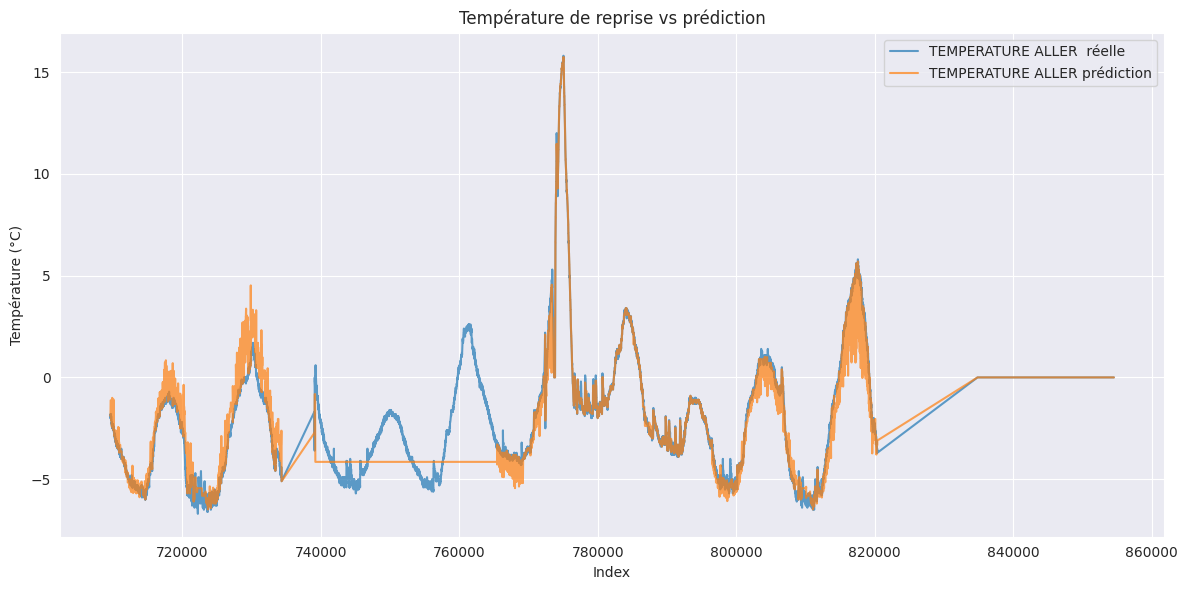

In [128]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# Trace seulement la première variable si multivarié
col = y_test.columns[1]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(y_test[col], label='TEMPERATURE ALLER  réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='TEMPERATURE ALLER prédiction', alpha=0.7)
#plt.plot(X_test['CONSIGNE_BALLON_CHAUD [R]_C4'], label='MEG CHAUD consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


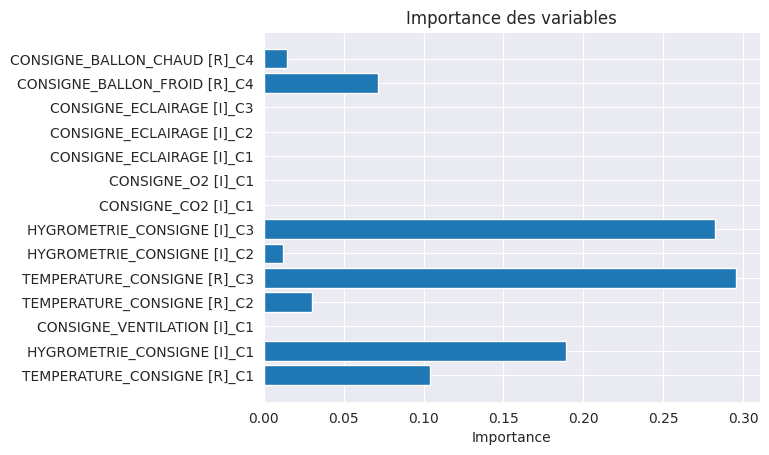

In [145]:
import matplotlib.pyplot as plt
importances = model_retour_aller.feature_importances_

feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

In [146]:
TCF_pred = y_pred_df

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = fd[

    [

        'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
         'CONSIGNE_ECLAIRAGE [I]_C2',
         'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
#'BP_R134_EN_BARS [R]_C4',
#'BP_R134_EN_DEGRES [R]_C4',
       # 'HP_R134_EN_BARS [R]_C4',
#'HP_R134_EN_DEGRES [R]_C4',
  # 'TEMPERATURE_REPRISE [R]_C1',
  #        'TEMPERATURE_REPRISE [R]_C2',
  #        'TEMPERATURE_REPRISE [R]_C3',
  #
        'TEMPERATURE_ALLER_CHAUD [R]_C1',
        'TEMPERATURE_ALLER_FROID [R]_C1',

        'TEMPERATURE_ALLER_CHAUD [R]_C2',
        'TEMPERATURE_ALLER_FROID [R]_C2',

        'TEMPERATURE_ALLER_CHAUD [R]_C3',
        'TEMPERATURE_ALLER_FROID [R]_C3',

        'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        'TEMPERATURE_RETOUR_FROID [R]_C1',


        'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        'TEMPERATURE_RETOUR_FROID [R]_C2',


        'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'

     ]

]

y = fd[[
             'TEMPERATURE_REPRISE [R]_C1',
         'TEMPERATURE_REPRISE [R]_C2',
         'TEMPERATURE_REPRISE [R]_C3',

       'HYGROMETRIE_CELLULE [R]_C1',
        'HYGROMETRIE_CELLULE [R]_C2',
       'HYGROMETRIE_CONSIGNE [I]_C3',


         ]]


X_test_with_TRC = pd.concat([X_test, y_pred_df], axis=1)


X_test = X_test_with_TRC[[
    'TEMPERATURE_CONSIGNE [R]_C1',
        'HYGROMETRIE_CONSIGNE [I]_C1',
        'CONSIGNE_VENTILATION [I]_C1',
        #
        'TEMPERATURE_CONSIGNE [R]_C2',
        'TEMPERATURE_CONSIGNE [R]_C3',
        #
        'HYGROMETRIE_CONSIGNE [I]_C2',
        'HYGROMETRIE_CONSIGNE [I]_C3',
        # #
        'CONSIGNE_CO2 [I]_C1',
        'CONSIGNE_O2 [I]_C1',
        #
        'CONSIGNE_ECLAIRAGE [I]_C1',
         'CONSIGNE_ECLAIRAGE [I]_C2',
         'CONSIGNE_ECLAIRAGE [I]_C3',
        'CONSIGNE_BALLON_FROID [R]_C4',
        'CONSIGNE_BALLON_CHAUD [R]_C4',
#'BP_R134_EN_BARS [R]_C4',
#'BP_R134_EN_DEGRES [R]_C4',
       # 'HP_R134_EN_BARS [R]_C4',
#'HP_R134_EN_DEGRES [R]_C4',
  # 'TEMPERATURE_REPRISE [R]_C1',
  #        'TEMPERATURE_REPRISE [R]_C2',
  #        'TEMPERATURE_REPRISE [R]_C3',
  #
        'TEMPERATURE_ALLER_CHAUD [R]_C1',
        'TEMPERATURE_ALLER_FROID [R]_C1',

        'TEMPERATURE_ALLER_CHAUD [R]_C2',
        'TEMPERATURE_ALLER_FROID [R]_C2',

        'TEMPERATURE_ALLER_CHAUD [R]_C3',
        'TEMPERATURE_ALLER_FROID [R]_C3',

        'TEMPERATURE_RETOUR_CHAUD [R]_C1',
        'TEMPERATURE_RETOUR_FROID [R]_C1',


        'TEMPERATURE_RETOUR_CHAUD [R]_C2',
        'TEMPERATURE_RETOUR_FROID [R]_C2',


        'TEMPERATURE_RETOUR_CHAUD [R]_C3',
        'TEMPERATURE_RETOUR_FROID [R]_C3',

        # 'TEMPERATURE_MEG_FROID [R]_C4',
        # 'TEMPERATURE_MEG_CHAUD [R]_C4'

]]
y_test = ld[[
        'TEMPERATURE_REPRISE [R]_C1',
         'TEMPERATURE_REPRISE [R]_C2',
         'TEMPERATURE_REPRISE [R]_C3',

          'HYGROMETRIE_CELLULE [R]_C1',
        'HYGROMETRIE_CELLULE [R]_C2',
       'HYGROMETRIE_CONSIGNE [R]_C3',
]]



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_TEMP_REPR = DecisionTreeRegressor(max_depth=100)
model_TEMP_REPR.fit(X, y)

# Évaluation
y_pred = model_TEMP_REPR.predict(X_test)

print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("R2" ,r2_score(y_test, y_pred))

KeyError: "['HYGROMETRIE_CELLULE [I]_C1', 'HYGROMETRIE_CELLULE [I]_C2'] not in index"

In [148]:
X_test.columns

Index(['TEMPERATURE_CONSIGNE [R]_C1', 'HYGROMETRIE_CONSIGNE [I]_C1',
       'CONSIGNE_VENTILATION [I]_C1', 'TEMPERATURE_CONSIGNE [R]_C2',
       'TEMPERATURE_CONSIGNE [R]_C3', 'HYGROMETRIE_CONSIGNE [I]_C2',
       'HYGROMETRIE_CONSIGNE [I]_C3', 'CONSIGNE_CO2 [I]_C1',
       'CONSIGNE_O2 [I]_C1', 'CONSIGNE_ECLAIRAGE [I]_C1',
       'CONSIGNE_ECLAIRAGE [I]_C2', 'CONSIGNE_ECLAIRAGE [I]_C3',
       'CONSIGNE_BALLON_FROID [R]_C4', 'CONSIGNE_BALLON_CHAUD [R]_C4',
       'TEMPERATURE_ALLER_CHAUD [R]_C1', 'TEMPERATURE_ALLER_FROID [R]_C1',
       'TEMPERATURE_ALLER_CHAUD [R]_C2', 'TEMPERATURE_ALLER_FROID [R]_C2',
       'TEMPERATURE_ALLER_CHAUD [R]_C3', 'TEMPERATURE_ALLER_FROID [R]_C3',
       'TEMPERATURE_RETOUR_CHAUD [R]_C1', 'TEMPERATURE_RETOUR_FROID [R]_C1',
       'TEMPERATURE_RETOUR_CHAUD [R]_C2', 'TEMPERATURE_RETOUR_FROID [R]_C2',
       'TEMPERATURE_RETOUR_CHAUD [R]_C3', 'TEMPERATURE_RETOUR_FROID [R]_C3'],
      dtype='object')

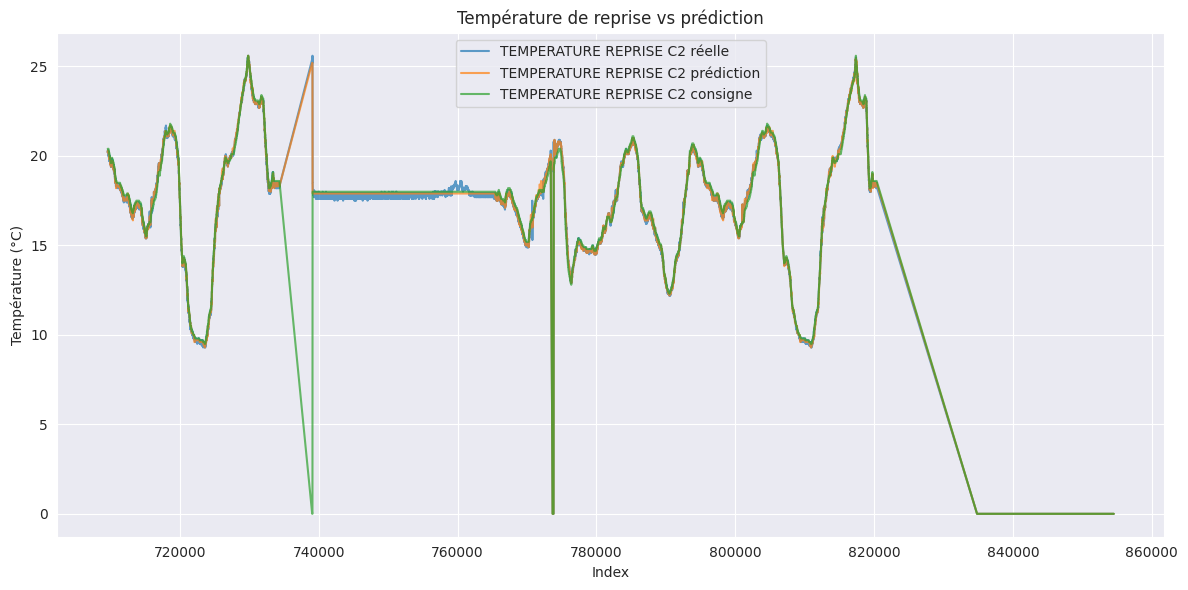

In [150]:
import matplotlib.pyplot as plt


# Créer DataFrame pour les prédictions
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# Trace seulement la première variable si multivarié
col = y_test.columns[1]  # Exemple : 'TEMPERATURE_REPRISE [R]_C1'

plt.figure(figsize=(12, 6))
plt.plot(y_test[col], label='TEMPERATURE REPRISE C2 réelle', alpha=0.7)
plt.plot(y_pred_df[col], label='TEMPERATURE REPRISE C2 prédiction', alpha=0.7)
plt.plot(X_test['TEMPERATURE_CONSIGNE [R]_C2'], label='TEMPERATURE REPRISE C2 consigne', alpha=0.7)

plt.title("Température de reprise vs prédiction")
plt.xlabel("Index")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


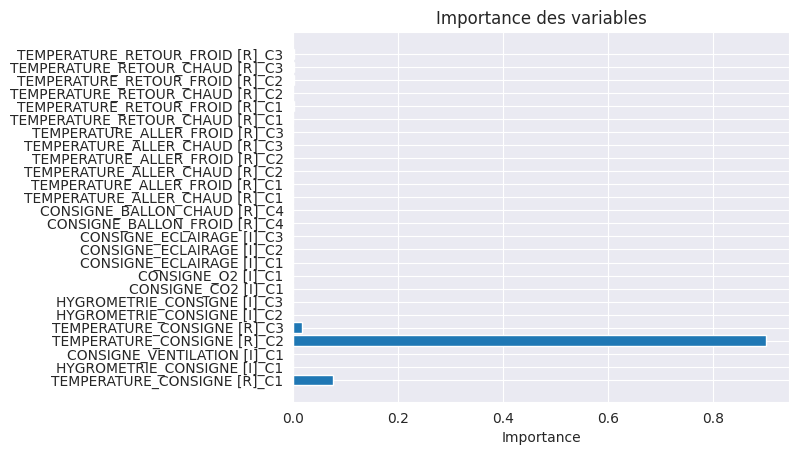

In [151]:
import matplotlib.pyplot as plt
importances = model_TEMP_REPR.feature_importances_

feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()